In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_excel("Agmarknet_Price_Report.xlsx")

In [3]:
df.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600,2023-04-29
1,2,Hassan,Arakalgud,Tomato,Tomato,FAQ,2500,2500,2500,2023-04-22
2,3,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600,2022-07-23
3,4,Hassan,Arakalgud,Tomato,Tomato,FAQ,1500,1500,1500,2022-02-19
4,5,Hassan,Arakalgud,Tomato,Tomato,FAQ,1200,1200,1200,2022-02-05


In [4]:
df.describe()

,Sl no.,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
count,30062.000000,30062.000000,30062.000000,30062.000000
mean,15031.500000,1230.838467,2077.796853,1640.669782
std,8678.296233,1313.208966,1911.667809,1503.835558
min,1.000000,4.000000,6.000000,5.000000
25%,7516.250000,400.000000,1000.000000,733.000000
50%,15031.500000,800.000000,1500.000000,1133.000000
75%,22546.750000,1500.000000,2500.000000,2000.000000
max,30062.000000,12500.000000,90000.000000,17500.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30062 entries, 0 to 30061
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl no.                     30062 non-null  int64         
 1   District Name              30062 non-null  object        
 2   Market Name                30062 non-null  object        
 3   Commodity                  30062 non-null  object        
 4   Variety                    30062 non-null  object        
 5   Grade                      30062 non-null  object        
 6   Min Price (Rs./Quintal)    30062 non-null  int64         
 7   Max Price (Rs./Quintal)    30062 non-null  int64         
 8   Modal Price (Rs./Quintal)  30062 non-null  int64         
 9   Price Date                 30062 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 2.3+ MB


In [6]:
df = df.drop("Sl no.",axis=1)

In [7]:
df.rename(columns={"District Name":"District_Name","Market Name":"Market_Name","Min Price (Rs./Quintal)":"MinPrice_Quintal","Max Price (Rs./Quintal)":"MaxPrice_Quintal","Modal Price (Rs./Quintal)":"ModalPrice_Quintal","Price Date":"Price_Date"},inplace=True)
df.head(1)

,District_Name,Market_Name,Commodity,Variety,Grade,MinPrice_Quintal,MaxPrice_Quintal,ModalPrice_Quintal,Price_Date
0,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600,2023-04-29


In [8]:
#1. Check for duplicates
df.duplicated().sum()

0

In [9]:
#2. Check for missing values
df.isna().sum().sum()

0

In [10]:
#3. Check for outliers
# sns.boxplot()

In [11]:
#4. Categorical encoding
label1 = LabelEncoder().fit_transform(df['District_Name'])
df.drop("District_Name",axis=1,inplace=True)
df['District_Name']=label1

In [12]:
label2 = LabelEncoder().fit_transform(df['Market_Name'])
df.drop("Market_Name",axis=1,inplace=True)
df['Market_Name']=label2

In [13]:
label3 = LabelEncoder().fit_transform(df['Variety'])
df.drop("Variety",axis=1,inplace=True)
df['Variety']=label3

In [14]:
label4 = LabelEncoder().fit_transform(df['Grade'])
df.drop("Grade",axis=1,inplace=True)
df['Grade']=label4

In [15]:
df.head()

,Commodity,MinPrice_Quintal,MaxPrice_Quintal,ModalPrice_Quintal,Price_Date,District_Name,Market_Name,Variety,Grade
0,Tomato,1600,1600,1600,2023-04-29,9,0,1,0
1,Tomato,2500,2500,2500,2023-04-22,9,0,1,0
2,Tomato,1600,1600,1600,2022-07-23,9,0,1,0
3,Tomato,1500,1500,1500,2022-02-19,9,0,1,0
4,Tomato,1200,1200,1200,2022-02-05,9,0,1,0


In [16]:
df = df.drop('Commodity',axis=1)
df = df.drop('Price_Date',axis=1)
x= df.drop("ModalPrice_Quintal",axis=1)
y= df[["ModalPrice_Quintal"]]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3)

In [18]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [19]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR.coef_[0][idx]))

The coefficient for MinPrice_Quintal is 0.5747503221852995
The coefficient for MaxPrice_Quintal is 0.4405856368597708
The coefficient for District_Name is -0.549592321072067
The coefficient for Market_Name is -1.1225175977306483
The coefficient for Variety is -8.26609925648522
The coefficient for Grade is 5.884395566591483


In [20]:
LR.score(x_train,y_train)

0.9733138323659664

In [21]:
LR.score(x_test,y_test)

0.9214365484364764

In [22]:
y_train

,ModalPrice_Quintal
542,310
9209,1330
24598,1600
28496,800
12222,700
...,...
17289,5000
5192,400
12172,1000
235,1000


In [23]:
y_pred = LR.predict(x_test)

In [24]:
metrics.r2_score(y_test,y_pred)

0.9214365484364764

In [25]:
metrics.mean_absolute_error(y_test,y_pred)

99.68814352838403

In [26]:
metrics.mean_squared_error(y_test,y_pred)

179821.24979799948

In [27]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

424.05335725354126

In [28]:
y_test

,ModalPrice_Quintal
12352,650
17380,1000
21522,533
2132,3100
1906,400
...,...
4805,800
2563,1500
12631,2000
1433,700


In [29]:
error = y_test - y_pred
error

,ModalPrice_Quintal
12352,-14.023890
17380,-56.115138
21522,48.693276
2132,75.133484
1906,-64.377994
...,...
4805,1.045380
2563,130.313113
12631,408.029212
1433,45.971283


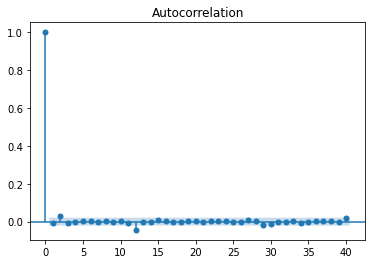

In [30]:
acf = plot_acf(error)
plt.show()

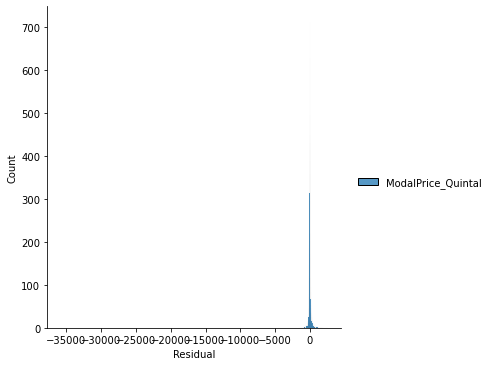

In [31]:
sns.displot(error)
plt.xlabel("Residual")
plt.show()

In [32]:
data_train = pd.concat([x_train,y_train],axis=1)
data_test = pd.concat([x_test,y_test],axis=1)
data_train.head()

,MinPrice_Quintal,MaxPrice_Quintal,District_Name,Market_Name,Variety,Grade,ModalPrice_Quintal
542,220,380,4,2,1,0,310
9209,530,2000,12,13,1,0,1330
24598,1000,2000,0,44,1,0,1600
28496,500,1000,16,49,0,0,800
12222,500,1000,8,17,1,0,700


In [33]:
expr = "ModalPrice_Quintal ~ MinPrice_Quintal + MaxPrice_Quintal + District_Name + Market_Name + Variety + Grade"

In [34]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=expr, data=data_train).fit()
lm1.params

Intercept           59.246744
MinPrice_Quintal     0.574750
MaxPrice_Quintal     0.440586
District_Name       -0.549592
Market_Name         -1.122518
Variety             -8.266099
Grade                5.884396
dtype: float64

In [35]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:     ModalPrice_Quintal   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.279e+05
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:36:23   Log-Likelihood:            -1.4562e+05
No. Observations:               21043   AIC:                         2.913e+05
Df Residuals:                   21036   BIC:                         2.913e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           59.2467      7.383  

In [36]:
# Prediction on Test data
y_predlm = lm1.predict(data_test)

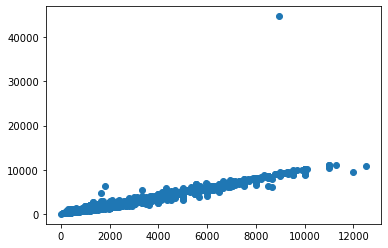

In [37]:
plt.scatter(y_test['ModalPrice_Quintal'], y_predlm)
plt.show()

In [38]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(59.25) * Intercept + (0.57) * MinPrice_Quintal + (0.44) * MaxPrice_Quintal + (-0.55) * District_Name + (-1.12) * Market_Name + (-8.27) * Variety + (5.88) * Grade + 

## Time series forecasting

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
dfts = pd.read_excel("Agmarknet_Price_Report.xlsx")

In [79]:
dfts.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600,2023-04-29
1,2,Hassan,Arakalgud,Tomato,Tomato,FAQ,2500,2500,2500,2023-04-22
2,3,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600,2022-07-23
3,4,Hassan,Arakalgud,Tomato,Tomato,FAQ,1500,1500,1500,2022-02-19
4,5,Hassan,Arakalgud,Tomato,Tomato,FAQ,1200,1200,1200,2022-02-05


In [83]:
dfts = pd.read_excel("Agmarknet_Price_Report.xlsx", parse_dates=['Price Date'],index_col='Price Date')
dfts = dfts.drop('Sl no.',axis=1)
dfts.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,,,,,
2023-04-29,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600
2023-04-22,Hassan,Arakalgud,Tomato,Tomato,FAQ,2500,2500,2500
2022-07-23,Hassan,Arakalgud,Tomato,Tomato,FAQ,1600,1600,1600
2022-02-19,Hassan,Arakalgud,Tomato,Tomato,FAQ,1500,1500,1500
2022-02-05,Hassan,Arakalgud,Tomato,Tomato,FAQ,1200,1200,1200


In [84]:
dfts.tail(2)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,,,,,
2020-02-12,Udupi,Udupi,Tomato,Tomato,FAQ,1000,1200,1100
2020-02-05,Udupi,Udupi,Tomato,Tomato,FAQ,1200,1600,1400


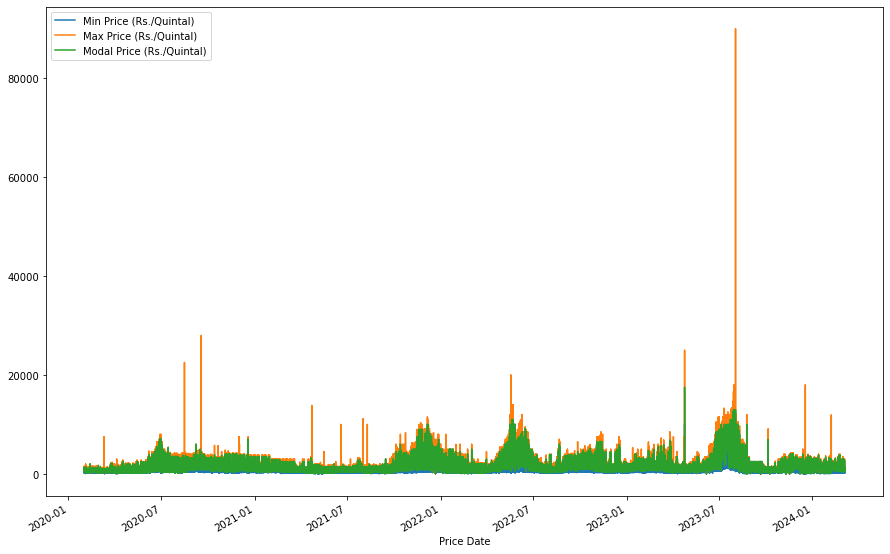

In [93]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
dfts.plot()
plt.show()